In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
clother_list = [ 'aizel' ]

In [3]:
for clother in clother_list:
    file_name_categories = clother+'_categories.csv'
    file_name_products = clother+'_products.csv'
    file_name_purchases = clother+'_purchases.csv'
    file_name_customers = clother+'_customers.csv'
    file_name_products_names = clother+'_products_names.csv'
    file_name_categories_names = clother+'_categories_names.csv'
    
    
    df_products_names = pd.read_csv(file_name_products_names)
    df_categories_names = pd.read_csv(file_name_categories_names)
    df_categories = pd.read_csv(file_name_categories)
    df_products = pd.read_csv(file_name_products)
    df_purchases = pd.read_csv(file_name_purchases)
    df_customers = pd.read_csv(file_name_customers)

In [4]:
df_purchases

,Unnamed: 0,customer_id,product_id,datetime,order_id,area_id
0,0,7190,56498,2019-03-12 09:59:28.000,28,NaN
1,1,7190,56486,2019-03-13 09:29:44.000,29,NaN
2,2,1113649,56889,2019-03-14 18:19:04.720,170,NaN
3,3,1113649,56883,2019-03-14 18:19:04.720,170,NaN
4,4,1113649,56884,2019-03-14 18:19:04.720,170,NaN
...,...,...,...,...,...,...
421927,421927,1263655,874801,2021-09-08 16:42:33.000,481716,NaN
421928,421928,1263655,890402,2021-09-08 16:42:33.000,481716,NaN
421929,421929,103621,879727,2021-09-09 07:24:05.000,481727,NaN
421930,421930,103621,892620,2021-09-09 07:24:05.000,481727,NaN


In [5]:
df_products

,Unnamed: 0,product_id,group_id,price,old_price,manufacturer_id,is_product_unknown,external_system_id,is_available,brand_id,area_id,is_product_in_segment
0,0,364509,0,NaN,NaN,NaN,1,1,False,1,NaN,1
1,1,416609,1,NaN,NaN,NaN,1,1,False,1,NaN,1
2,2,621234,2,105000.0,NaN,1612.0,0,1,False,1,NaN,1
3,3,564365,3,0.0,NaN,162.0,0,1,False,1,NaN,1
4,4,231899,4,5000.0,NaN,472.0,0,1,False,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
856402,856402,243310,194303,42000.0,NaN,24.0,0,1,False,1,NaN,1
856403,856403,350466,194303,42000.0,NaN,24.0,0,1,False,1,NaN,1
856404,856404,353498,194303,42000.0,NaN,24.0,0,1,False,1,NaN,1
856405,856405,243632,194303,42000.0,NaN,24.0,0,1,False,1,NaN,1


In [6]:
df_customers

,Unnamed: 0,customer_id,sex,email,age_in_years,customer_area_id,point_of_contact,time_zone
0,0,68982,Female,Rnvn@mail.ru,NaN,NaN,10,Europe/Moscow
1,1,70057,Female,G.tanya96@yandex.ru,NaN,NaN,10,Europe/Moscow
2,2,70041,Female,Umahanovajulduz@mail.ru,NaN,NaN,10,Europe/Moscow
3,3,436589,Female,nina-bre@yandex.ru,NaN,NaN,10,Europe/Moscow
4,4,70023,Female,Zoyaiglova@yandex.ru,NaN,NaN,10,Europe/Moscow
...,...,...,...,...,...,...,...,...
428984,428984,1263702,NaN,NaN,NaN,NaN,304,NaN
428985,428985,1263703,NaN,NaN,NaN,NaN,304,NaN
428986,428986,1263706,NaN,NaN,NaN,NaN,21,Europe/Moscow
428987,428987,1263707,NaN,NaN,NaN,NaN,304,NaN


In [7]:
df_products_purchases = df_purchases.merge(df_products, on = 'product_id', how = 'left')
df_products_purchases = df_products_purchases [['datetime','customer_id','product_id','price']]
df_products_purchases.head()

,datetime,customer_id,product_id,price
0,2019-03-12 09:59:28.000,7190,56498,10500.0
1,2019-03-13 09:29:44.000,7190,56486,1740.0
2,2019-03-14 18:19:04.720,1113649,56889,0.0
3,2019-03-14 18:19:04.720,1113649,56883,15800.0
4,2019-03-14 18:19:04.720,1113649,56884,6850.0


In [8]:
df_products_purchases_full = df_products_purchases.merge(df_customers, on = 'customer_id', how = 'left')
df_products_purchases_full = df_products_purchases_full [['datetime','customer_id','product_id','price','sex']]
df_products_purchases_full.head()

,datetime,customer_id,product_id,price,sex
0,2019-03-12 09:59:28.000,7190,56498,10500.0,Male
1,2019-03-13 09:29:44.000,7190,56486,1740.0,Male
2,2019-03-14 18:19:04.720,1113649,56889,0.0,Female
3,2019-03-14 18:19:04.720,1113649,56883,15800.0,Female
4,2019-03-14 18:19:04.720,1113649,56884,6850.0,Female


In [9]:
df_products_purchases['datetime'] = pd.to_datetime(df_products_purchases['datetime'] )

In [10]:
df_products_purchases['year'] = df_products_purchases['datetime'].dt.year
df_products_purchases['month'] = df_products_purchases['datetime'].dt.month
df_products_purchases['day'] = df_products_purchases['datetime'].dt.day
df_products_purchases['hour'] = df_products_purchases['datetime'].dt.hour
df_products_purchases

,datetime,customer_id,product_id,price,year,month,day,hour
0,2019-03-12 09:59:28.000,7190,56498,10500.0,2019,3,12,9
1,2019-03-13 09:29:44.000,7190,56486,1740.0,2019,3,13,9
2,2019-03-14 18:19:04.720,1113649,56889,0.0,2019,3,14,18
3,2019-03-14 18:19:04.720,1113649,56883,15800.0,2019,3,14,18
4,2019-03-14 18:19:04.720,1113649,56884,6850.0,2019,3,14,18
...,...,...,...,...,...,...,...,...
421927,2021-09-08 16:42:33.000,1263655,874801,4950.0,2021,9,8,16
421928,2021-09-08 16:42:33.000,1263655,890402,11950.0,2021,9,8,16
421929,2021-09-09 07:24:05.000,103621,879727,10160.0,2021,9,9,7
421930,2021-09-09 07:24:05.000,103621,892620,109350.0,2021,9,9,7


In [11]:
df_products_purchases = df_products_purchases.set_index('datetime')
df_products_purchases

,customer_id,product_id,price,year,month,day,hour
datetime,,,,,,,
2019-03-12 09:59:28.000,7190,56498,10500.0,2019,3,12,9
2019-03-13 09:29:44.000,7190,56486,1740.0,2019,3,13,9
2019-03-14 18:19:04.720,1113649,56889,0.0,2019,3,14,18
2019-03-14 18:19:04.720,1113649,56883,15800.0,2019,3,14,18
2019-03-14 18:19:04.720,1113649,56884,6850.0,2019,3,14,18
...,...,...,...,...,...,...,...
2021-09-08 16:42:33.000,1263655,874801,4950.0,2021,9,8,16
2021-09-08 16:42:33.000,1263655,890402,11950.0,2021,9,8,16
2021-09-09 07:24:05.000,103621,879727,10160.0,2021,9,9,7


In [12]:
df_products_purchases_full['datetime'] = pd.to_datetime(df_products_purchases_full['datetime'] )

In [13]:
df_products_purchases_full['year'] = df_products_purchases_full['datetime'].dt.year
df_products_purchases_full['month'] = df_products_purchases_full['datetime'].dt.month
df_products_purchases_full['day'] = df_products_purchases_full['datetime'].dt.day
df_products_purchases_full['hour'] = df_products_purchases_full['datetime'].dt.hour
df_products_purchases_full

,datetime,customer_id,product_id,price,sex,year,month,day,hour
0,2019-03-12 09:59:28.000,7190,56498,10500.0,Male,2019,3,12,9
1,2019-03-13 09:29:44.000,7190,56486,1740.0,Male,2019,3,13,9
2,2019-03-14 18:19:04.720,1113649,56889,0.0,Female,2019,3,14,18
3,2019-03-14 18:19:04.720,1113649,56883,15800.0,Female,2019,3,14,18
4,2019-03-14 18:19:04.720,1113649,56884,6850.0,Female,2019,3,14,18
...,...,...,...,...,...,...,...,...,...
421927,2021-09-08 16:42:33.000,1263655,874801,4950.0,NaN,2021,9,8,16
421928,2021-09-08 16:42:33.000,1263655,890402,11950.0,NaN,2021,9,8,16
421929,2021-09-09 07:24:05.000,103621,879727,10160.0,NaN,2021,9,9,7
421930,2021-09-09 07:24:05.000,103621,892620,109350.0,NaN,2021,9,9,7


In [14]:
df_products_purchases_full = df_products_purchases_full.set_index('datetime')
df_products_purchases_full

,customer_id,product_id,price,sex,year,month,day,hour
datetime,,,,,,,,
2019-03-12 09:59:28.000,7190,56498,10500.0,Male,2019,3,12,9
2019-03-13 09:29:44.000,7190,56486,1740.0,Male,2019,3,13,9
2019-03-14 18:19:04.720,1113649,56889,0.0,Female,2019,3,14,18
2019-03-14 18:19:04.720,1113649,56883,15800.0,Female,2019,3,14,18
2019-03-14 18:19:04.720,1113649,56884,6850.0,Female,2019,3,14,18
...,...,...,...,...,...,...,...,...
2021-09-08 16:42:33.000,1263655,874801,4950.0,NaN,2021,9,8,16
2021-09-08 16:42:33.000,1263655,890402,11950.0,NaN,2021,9,8,16
2021-09-09 07:24:05.000,103621,879727,10160.0,NaN,2021,9,9,7


#### 1.1 All Purchases 2020 jan - aug

In [15]:
df_selected_1 = df_products_purchases_full.loc['2020-01-01':'2020-08-31'][['customer_id', 'product_id', 'price','sex','hour']]
df_selected_1

/var/folders/x0/lrf4lgp11194c9s35dxqfq4h0000gn/T/ipykernel_52242/2756417778.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_selected_1 = df_products_purchases_full.loc['2020-01-01':'2020-08-31'][['customer_id', 'product_id', 'price','sex','hour']]


,customer_id,product_id,price,sex,hour
datetime,,,,,
2020-01-01 17:26:05,625784,85381,4450.0,Female,17
2020-01-01 18:11:17,854993,74466,5550.0,Female,18
2020-01-01 18:15:51,854993,95342,7050.0,Female,18
2020-01-01 18:16:41,854993,168852,5350.0,Female,18
2020-01-01 18:19:35,854993,108610,6450.0,Female,18
...,...,...,...,...,...
2020-08-31 20:45:23,1189501,676356,89000.0,Female,20
2020-08-31 14:19:04,1189649,45509,9320.0,NaN,14
2020-08-31 22:26:40,24775,671672,102600.0,Female,22


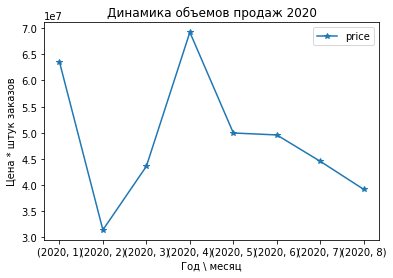

In [16]:
ax = df_selected_1.groupby([df_selected_1.index.year, df_selected_1.index.month]).sum()[['price']].plot(style = '*-')
ax.set_title('Динамика объемов продаж 2020')
ax.set_xlabel('Год \ месяц');
ax.set_ylabel('Цена * штук заказов');

#### 1.2 Mean order cost (all)

In [17]:
df_selected_midlle_price_1 = df_selected_1\
    .groupby([df_selected_1.index.year, df_selected_1.index.month,df_selected_1.index.day, 'customer_id'])\
    .sum()[['price']]
df_selected_midlle_price_1


price
datetime datetime datetime customer_id         
2020     1        1        22493        54930.0
                           45884         8705.0
                           84121        19950.0
                           126787       22960.0
                           155021       22330.0
...                                         ...
         8        31       1189646      65140.0
                           1189649       9320.0
                           1189650      17250.0
                           1189684      53500.0
                           1205097      30000.0

[13291 rows x 1 columns]

In [18]:
df_selected_final_1 = df_selected_midlle_price_1.mean()
df_selected_final_1

price    29414.278459
dtype: float64

In [19]:
df_selected_midlle_price_sex1 = df_selected_1\
    .groupby([df_selected_1.index.year, df_selected_1.index.month,df_selected_1.index.day, 'customer_id','sex'])\
    .sum()[['price']]
df_selected_midlle_price_sex1



price
datetime datetime datetime customer_id sex            
2020     1        1        22493       Female  54930.0
                           45884       Male     8705.0
                           84121       Female  19950.0
                           126787      Female  22960.0
                           155021      Female  22330.0
...                                                ...
         8        31       1189613     Female  17300.0
                           1189623     Male    20720.0
                           1189646     Female  65140.0
                           1189650     Female  17250.0
                           1205097     Female  30000.0

[9396 rows x 1 columns]

#### 1.3 Mean order cost (Fem)

In [20]:
df_selected_sex1 = df_selected_1.loc[df_selected_1['sex'] == 'Female']
df_selected_final_sex1 = df_selected_sex1\
    .groupby([df_selected_sex1.index.year, df_selected_sex1.index.month,df_selected_sex1.index.day, 'customer_id','sex'])\
    .sum()[['price']]
print(df_selected_final_sex1)
df_selected_final_sex1 = df_selected_final_sex1.mean()
df_selected_final_sex1

                                                 price
datetime datetime datetime customer_id sex            
2020     1        1        22493       Female  54930.0
                           84121       Female  19950.0
                           126787      Female  22960.0
                           155021      Female  22330.0
                           181957      Female   2320.0
...                                                ...
         8        31       1189609     Female  38650.0
                           1189613     Female  17300.0
                           1189646     Female  65140.0
                           1189650     Female  17250.0
                           1205097     Female  30000.0

[8457 rows x 1 columns]


price    30253.134918
dtype: float64

#### 1.4 Mean order cost (Male)

In [21]:
df_selected_sex2 = df_selected_1.loc[df_selected_1['sex'] == 'Male']
df_selected_final_sex2 = df_selected_sex2\
    .groupby([df_selected_sex2.index.year, df_selected_sex2.index.month,df_selected_sex2.index.day, 'customer_id','sex'])\
    .sum()[['price']]
print(df_selected_final_sex2)
df_selected_final_sex2 = df_selected_final_sex2.mean()
df_selected_final_sex2

                                               price
datetime datetime datetime customer_id sex          
2020     1        1        45884       Male   8705.0
                  2        867689      Male   6365.0
                           1091160     Male      0.0
                  3        168087      Male  17743.0
                           599514      Male      0.0
...                                              ...
         8        30       1189549     Male  60500.0
                  31       72066       Male  24780.0
                           97991       Male  28600.0
                           1189599     Male  11195.0
                           1189623     Male  20720.0

[939 rows x 1 columns]


price    30714.230032
dtype: float64

#### 2.1 All purchases 2021 (jan - aug)

In [22]:
df_selected_2 = df_products_purchases_full.loc['2021-01-01':'2021-08-31'][['customer_id', 'product_id', 'price','sex','hour']]
df_selected_2

/var/folders/x0/lrf4lgp11194c9s35dxqfq4h0000gn/T/ipykernel_52242/2191188514.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_selected_2 = df_products_purchases_full.loc['2021-01-01':'2021-08-31'][['customer_id', 'product_id', 'price','sex','hour']]


,customer_id,product_id,price,sex,hour
datetime,,,,,
2021-01-02 09:14:45,98079,370348,8500.0,Male,9
2021-01-02 09:16:58,98079,89170,3000.0,Male,9
2021-01-01 22:23:53,1228997,869651,3660.0,Male,22
2021-01-01 21:20:57,1228997,427441,23100.0,Male,21
2021-01-02 13:02:58,1229084,491126,23050.0,Male,13
...,...,...,...,...,...
2021-08-30 10:15:26,101543,877514,15600.0,Male,10
2021-08-30 10:15:26,101543,877567,5900.0,Male,10
2021-08-30 10:15:26,101543,877506,5900.0,Male,10


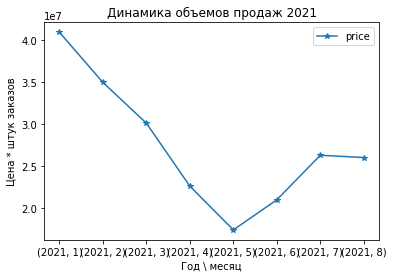

In [23]:
ax2 = df_selected_2.groupby([df_selected_2.index.year, df_selected_2.index.month]).sum()[['price']].plot(style='*-')
ax2.set_title('Динамика объемов продаж 2021')
ax2.set_xlabel('Год \ месяц');
ax2.set_ylabel('Цена * штук заказов');

#### 2.2 Mean order cost (all)

In [24]:
df_selected_midlle_price_2 = df_selected_2\
    .groupby([df_selected_2.index.year, df_selected_2.index.month,df_selected_2.index.day,  'customer_id'])\
    .sum()[['price']]
df_selected_midlle_price_2

price
datetime datetime datetime customer_id         
2021     1        1        21740        33300.0
                           98627        31730.0
                           101435       26900.0
                           183469       21280.0
                           204658        7500.0
...                                         ...
         8        31       1249554      17500.0
                           1262236      48080.0
                           1262466      14400.0
                           1262864      22400.0
                           1262920      15100.0

[7165 rows x 1 columns]

In [25]:
df_selected_final_2 = df_selected_midlle_price_2.mean()
df_selected_final_2

price    30555.875645
dtype: float64

#### 2.3 Mean order cost (Fem)

In [26]:
df_selected_sex3 = df_selected_2.loc[df_selected_2['sex'] == 'Female']
df_selected_final_sex3 = df_selected_sex3\
    .groupby([df_selected_sex3.index.year, df_selected_sex3.index.month,df_selected_sex3.index.day, 'customer_id','sex'])\
    .sum()[['price']]
print(df_selected_final_sex3)
df_selected_final_sex3 = df_selected_final_sex3.mean()
df_selected_final_sex3

                                                 price
datetime datetime datetime customer_id sex            
2021     1        1        21740       Female  33300.0
                           98627       Female  31730.0
                           101435      Female  26900.0
                           183469      Female  21280.0
                           204658      Female   7500.0
...                                                ...
         8        31       1188567     Female   3380.0
                           1190098     Female  10800.0
                           1249554     Female  17500.0
                           1262236     Female  48080.0
                           1262466     Female  14400.0

[4763 rows x 1 columns]


price    30565.817132
dtype: float64

#### 2.4 Mean order cost (Male)

In [27]:
df_selected_sex4 = df_selected_2.loc[df_selected_2['sex'] == 'Male']
df_selected_final_sex4 = df_selected_sex4\
    .groupby([df_selected_sex4.index.year, df_selected_sex4.index.month,df_selected_sex4.index.day, 'customer_id','sex'])\
    .sum()[['price']]
print(df_selected_final_sex4)
df_selected_final_sex4 = df_selected_final_sex4.mean()
df_selected_final_sex4

                                                price
datetime datetime datetime customer_id sex           
2021     1        1        941403      Male    3660.0
                           1228909     Male   10000.0
                           1228943     Male    3316.0
                           1228997     Male   26760.0
                           1229011     Male   10560.0
...                                               ...
         8        27       1262549     Male   20000.0
                  28       171893      Male  105000.0
                           1262624     Male   24190.0
                  29       181136      Male   57080.0
                  30       101543      Male   55900.0

[820 rows x 1 columns]


price    32033.145122
dtype: float64

#### 3.1 Orders by hour

           price
hour            
0      2247725.0
1      1242451.0
2      1972549.0
3      2888991.0
4      4220021.0
5      8709909.0
6     12253389.0
7     21759409.0
8     29806216.0
9     30126655.0
10    30437441.0
11    30699645.0
12    27975925.0
13    25366341.0
14    22050598.0
15    25927137.0
16    19690533.0
17    17854026.0
18    17748683.0
19    17843650.0
20    17728268.0
21    10662996.0
22     7681485.0
23     4051132.0


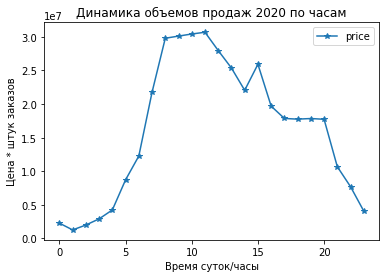

In [28]:
df_by_hour_1 = df_selected_1.groupby(['hour']).sum()[['price']].plot(style='*-')
df_by_hour_1.set_title('Динамика объемов продаж 2020 по часам')
df_by_hour_1.set_xlabel('Время суток/часы');
df_by_hour_1.set_ylabel('Цена * штук заказов');
print (df_selected_1.groupby(['hour']).sum()[['price']])

           price
hour            
0      1183262.0
1       952860.0
2       824816.0
3      1081463.0
4      3034466.0
5      4524441.0
6      6737210.0
7     13136572.0
8     17888946.0
9     18786214.0
10    15240386.0
11    15962811.0
12    14501311.0
13    15668852.0
14    14724419.0
15    11918733.0
16    10826563.0
17     9522312.0
18     9917869.0
19    11133674.0
20     9655754.0
21     5748119.0
22     3375672.0
23     2586124.0


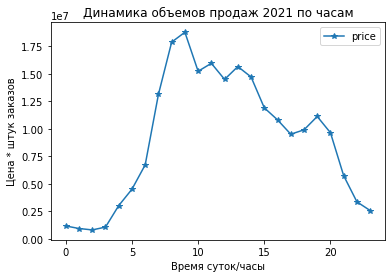

In [29]:
df_by_hour_2 = df_selected_2.groupby(['hour']).sum()[['price']].plot(style='*-')
df_by_hour_2.set_title('Динамика объемов продаж 2021 по часам')
df_by_hour_2.set_xlabel('Время суток/часы');
df_by_hour_2.set_ylabel('Цена * штук заказов');
print (df_selected_2.groupby(['hour']).sum()[['price']])

#### 3.2 Order by hour (fem)

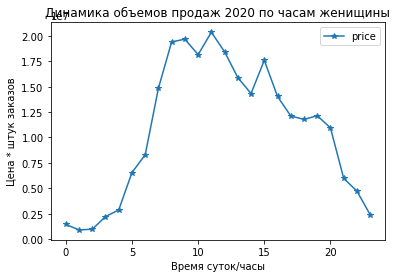

In [30]:
df_by_hour_1fem = df_selected_1\
    .loc[df_selected_1['sex'] == 'Female']\
    .groupby(['hour'])\
    .sum()[['price']]\
    .plot(style='*-')
df_by_hour_1fem.set_title('Динамика объемов продаж 2020 по часам женищины')
df_by_hour_1fem.set_xlabel('Время суток/часы');
df_by_hour_1fem.set_ylabel('Цена * штук заказов');

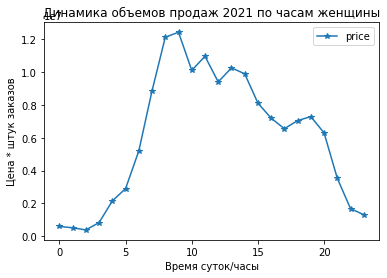

In [31]:
df_by_hour_2fem = df_selected_2\
    .loc[df_selected_2['sex'] == 'Female']\
    .groupby(['hour'])\
    .sum()[['price']]\
    .plot(style='*-')
df_by_hour_2fem.set_title('Динамика объемов продаж 2021 по часам женщины')
df_by_hour_2fem.set_xlabel('Время суток/часы');
df_by_hour_2fem.set_ylabel('Цена * штук заказов');

#### 3.3 Order by hour (male)

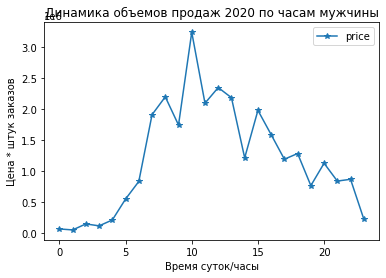

In [32]:
df_by_hour_1male = df_selected_1\
    .loc[df_selected_1['sex'] == 'Male']\
    .groupby(['hour'])\
    .sum()[['price']]\
    .plot(style='*-')
df_by_hour_1male.set_title('Динамика объемов продаж 2020 по часам мужчины')
df_by_hour_1male.set_xlabel('Время суток/часы');
df_by_hour_1male.set_ylabel('Цена * штук заказов');

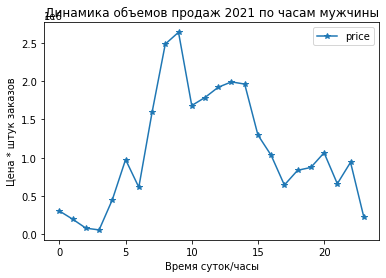

In [33]:
df_by_hour_2male = df_selected_2\
    .loc[df_selected_2['sex'] == 'Male']\
    .groupby(['hour']).sum()[['price']]\
    .plot(style='*-')
df_by_hour_2male.set_title('Динамика объемов продаж 2021 по часам мужчины')
df_by_hour_2male.set_xlabel('Время суток/часы');
df_by_hour_2male.set_ylabel('Цена * штук заказов');

#### 3.4 Order by hour (count)

      count
hour       
0        84
1        54
2        78
3       103
4       169
5       276
6       427
7       809
8      1006
9      1087
10     1017
11     1078
12     1003
13      941
14      917
15      852
16      686
17      651
18      683
19      694
20      672
21      443
22      272
23      157


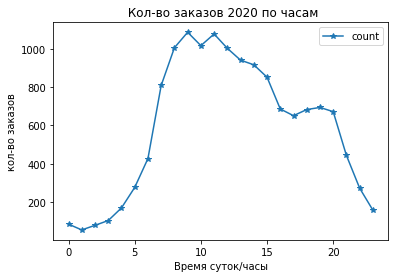

In [34]:
df_count_all_1 = df_selected_1\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1)\
    .plot(style='*-')
df_count_all_1.set_title(' Кол-во заказов 2020 по часам')
df_count_all_1.set_xlabel('Время суток/часы');
df_count_all_1.set_ylabel('кол-во заказов');
print (df_selected_1\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1))

      count
hour       
0        50
1        33
2        29
3        37
4        93
5       146
6       238
7       426
8       572
9       607
10      533
11      585
12      513
13      498
14      501
15      427
16      358
17      344
18      378
19      358
20      332
21      238
22      126
23       80


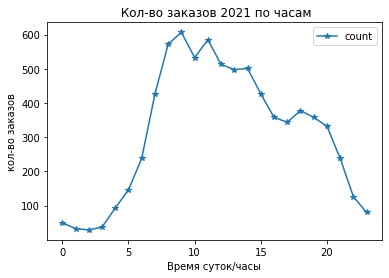

In [35]:
df_count_all_2 = df_selected_2\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1)\
    .plot(style='*-')
df_count_all_2.set_title(' Кол-во заказов 2021 по часам')
df_count_all_2.set_xlabel('Время суток/часы');
df_count_all_2.set_ylabel('кол-во заказов');
print (df_selected_2\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1))

#### 3.5 Order by hour (fem)


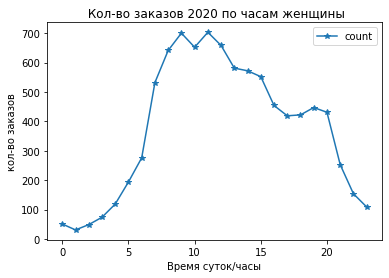

In [36]:
df_count_fem_1 = df_selected_1\
    .loc[df_selected_1['sex'] == 'Female']\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1)\
    .plot(style='*-')
df_count_fem_1.set_title(' Кол-во заказов 2020 по часам женщины')
df_count_fem_1.set_xlabel('Время суток/часы');
df_count_fem_1.set_ylabel('кол-во заказов');

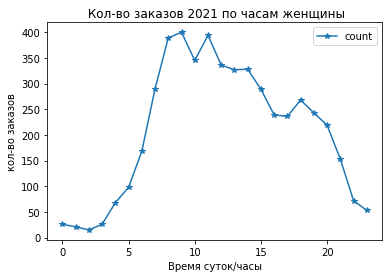

In [37]:
df_count_fem_2 = df_selected_2\
    .loc[df_selected_2['sex'] == 'Female']\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1)\
    .plot(style='*-')
df_count_fem_2.set_title(' Кол-во заказов 2021 по часам женщины')
df_count_fem_2.set_xlabel('Время суток/часы');
df_count_fem_2.set_ylabel('кол-во заказов');

#### 3.6 Order by hour (male)

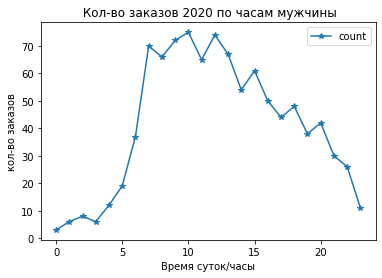

In [38]:
df_count_male_1 = df_selected_1\
    .loc[df_selected_1['sex'] == 'Male']\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1)\
    .plot(style='*-')
df_count_male_1.set_title(' Кол-во заказов 2020 по часам мужчины')
df_count_male_1.set_xlabel('Время суток/часы');
df_count_male_1.set_ylabel('кол-во заказов');

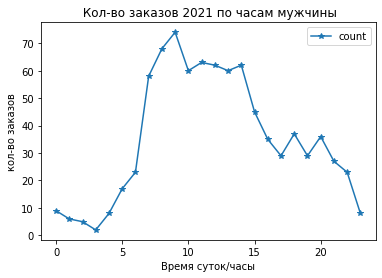

In [39]:
df_count_male_2 = df_selected_2\
    .loc[df_selected_2['sex'] == 'Male']\
    .groupby(['hour','datetime', 'customer_id'])\
    .aggregate({'price':'count'}).pivot_table(index='hour', aggfunc=lambda x: x.count())\
    .rename({'price':'count'}, axis = 1)\
    .plot(style='*-')
df_count_male_2.set_title(' Кол-во заказов 2021 по часам мужчины')
df_count_male_2.set_xlabel('Время суток/часы');
df_count_male_2.set_ylabel('кол-во заказов');

#### 4.1 Plus Categories


In [40]:
df_plus_names = df_products_purchases_full.merge(df_products_names, on = 'product_id', how = 'left')[['customer_id', 'product_id', 'price','sex','hour','product_name']]
df_plus_names

,customer_id,product_id,price,sex,hour,product_name
0,7190,56498,10500.0,Male,9,Черный ремень с отделкой
1,7190,56486,1740.0,Male,9,Темно-синие носки Tiago
2,1113649,56889,0.0,Female,18,Бежевые замшевые мокасины
3,1113649,56883,15800.0,Female,18,Топ купальника Jojo черно-белый
4,1113649,56884,6850.0,Female,18,Плавки Jojo черно-белые
...,...,...,...,...,...,...
421927,1263655,874801,4950.0,NaN,16,Белая футболка с надписью Bacci
421928,1263655,890402,11950.0,NaN,16,Сиреневая юбка с графическим принтом
421929,103621,879727,10160.0,NaN,7,Черный пуловер из шерсти и кашемира Hakueru
421930,103621,892620,109350.0,NaN,7,Черная кожаная куртка


In [41]:
df_plus_categories = df_plus_names\
.merge(df_categories, on = 'product_id', how = 'left')[['customer_id', 'product_id', 'price','sex','hour','product_name','productCategory', 'productCategoryParent', 'productCategoryParentParent']]
df_plus_categories

,customer_id,product_id,price,sex,hour,product_name,productCategory,productCategoryParent,productCategoryParentParent
0,7190,56498,10500.0,Male,9,Черный ремень с отделкой,396.0,7.0,2490.0
1,7190,56486,1740.0,Male,9,Темно-синие носки Tiago,670.0,625.0,23.0
2,1113649,56889,0.0,Female,18,Бежевые замшевые мокасины,1439.0,1248.0,1295.0
3,1113649,56883,15800.0,Female,18,Топ купальника Jojo черно-белый,5256.0,6046.0,5228.0
4,1113649,56884,6850.0,Female,18,Плавки Jojo черно-белые,5240.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
421927,1263655,874801,4950.0,NaN,16,Белая футболка с надписью Bacci,693.0,1026.0,725.0
421928,1263655,890402,11950.0,NaN,16,Сиреневая юбка с графическим принтом,1016.0,725.0,2490.0
421929,103621,879727,10160.0,NaN,7,Черный пуловер из шерсти и кашемира Hakueru,4432.0,4425.0,725.0
421930,103621,892620,109350.0,NaN,7,Черная кожаная куртка,541.0,160.0,725.0


In [42]:
df_count_top_categories = df_plus_categories\
    .groupby('productCategoryParentParent')\
    .aggregate({'productCategoryParentParent':'count'})\
    .rename({'productCategoryParentParent':'count_category'}, axis = 1)\
    .sort_values(by = 'count_category', ascending = False)
df_count_top_categories.reset_index()

,productCategoryParentParent,count_category
0,107.0,50579
1,2490.0,49577
2,725.0,29580
3,1568.0,25066
4,1250.0,18089
...,...,...
148,2093.0,3
149,5839.0,3
150,4725.0,2
151,726.0,2


In [43]:
df_rename_categories = df_categories_names\
    .rename({'category_id':'productCategoryParentParent'}, axis = 1)[['category_name','productCategoryParentParent']]
df_rename_categories

,category_name,productCategoryParentParent
0,Aizel,5
1,Белье,3892
2,Детское,644
3,Женское,2490
4,Мужское,23
...,...,...
5941,Lorna,4415
5942,Ozella,4446
5943,Seraphina,4452
5944,Tanya,4443


In [44]:
df_count_top_categories = df_count_top_categories.merge(df_rename_categories, on = 'productCategoryParentParent', how = 'left')
df_count_top_categories

,productCategoryParentParent,count_category,category_name
0,107.0,50579,Sale
1,2490.0,49577,Женское
2,725.0,29580,Одежда
3,1568.0,25066,Белье (593)
4,1250.0,18089,Одежда
...,...,...,...
148,2093.0,3,Uni
149,5839.0,3,E-mail
150,4725.0,2,Vive la France
151,726.0,2,Пальто


In [45]:
df_count_top_categories_other = df_count_top_categories[df_count_top_categories.index >10].aggregate({'count_category':'sum'}) 
df_count_top_categories_other

count_category    68044
dtype: int64

In [ ]:
## тут у меня вопрос :( 

In [46]:
df_count_top_categories_10 = df_count_top_categories[df_count_top_categories.index  <= 10] 
df_count_top_categories_10.loc[11] = [0,68044,'Other']
df_count_top_categories_10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,productCategoryParentParent,count_category,category_name
0,107.0,50579,Sale
1,2490.0,49577,Женское
2,725.0,29580,Одежда
3,1568.0,25066,Белье (593)
4,1250.0,18089,Одежда
5,5448.0,15686,Женское
6,577.0,13738,Красота
7,1239.0,12245,Outlet
8,975.0,11746,Обувь
9,2756.0,7596,E-mail (4599)


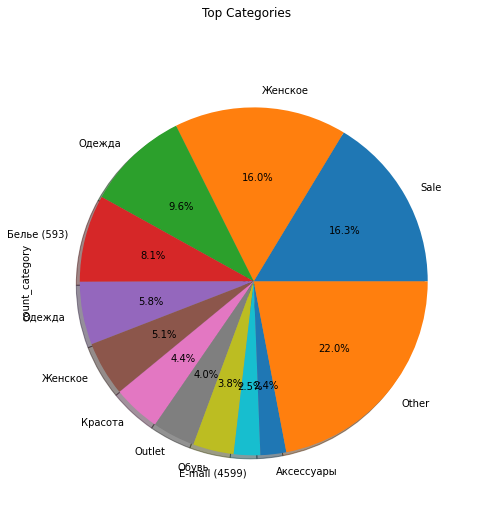

In [57]:
df_count_top_categories_10\
    .set_index('category_name')\
    .count_category\
    .plot\
    .pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', title="Top Categories", shadow=True);